In [1]:
from IPython.display import Audio
import os
import warnings
import numpy as np
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
sr = 22050
Audio("tracks/voices/common_voice_en_34925857.mp3")


In [4]:
import librosa
song_path = '/home/bekzhan/Desktop/dsd/DSD-Project/tracks/wake/wake_up  (517th copy).mp3'
y,sr = librosa.load(song_path,sr=22050)
y = librosa.util.normalize(y)
print(y)

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 36765.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


[-2.1909598e-04 -3.0954494e-04 -1.5233936e-04 ...  1.6469883e-05
  1.2858980e-05  0.0000000e+00]


In [5]:
def cut_song(song):
  start = 0
  end = len(song)
  
  song_pieces = []

  while start + 20000 < end:
    song_pieces.append(song[start:start+20000])

    start += 20000
  
  return song_pieces

In [6]:


def prepare_song(song_path):
  list_matrices = []
  y,sr = librosa.load(song_path,sr=41000)
  
  song_pieces = cut_song(y)
  for song_piece in song_pieces:
    melspect = librosa.feature.melspectrogram(song_piece)
    list_matrices.append(melspect)
  return list_matrices

In [7]:
all_tracks = []
genre = []
voices = os.listdir("/home/bekzhan/Desktop/dsd/DSD-Project/tracks/voices")
wake = os.listdir("/home/bekzhan/Desktop/dsd/DSD-Project/tracks/wake")

# add all the songs that are in the dramatic folder
for song_name in voices:
   song_pieces = prepare_song('/home/bekzhan/Desktop/dsd/DSD-Project/tracks/voices/' + song_name)
   all_tracks += song_pieces
   genre += ([1]*len(song_pieces))
print(len(all_tracks))
# add all the songs that are in the silly energy folder
for song_name in wake:
   song_pieces = prepare_song('/home/bekzhan/Desktop/dsd/DSD-Project/tracks/wake/' + song_name)
   all_tracks += song_pieces
   genre += ([0]*len(song_pieces))
print(len(all_tracks))

5391


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 36112.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 37047.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 37047.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 44035.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 36765.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 47660.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 47660.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 37

10597


Note: Illegal Audio-MPEG-Header 0x00000000 at offset 38061.
Note: Trying to resync...
Note: Hit end of (available) data during resync.


In [8]:
all_tracks = np.expand_dims(all_tracks, axis=-1)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(all_tracks), 
                                                    np.array(genre),
                                                    test_size=0.33,
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, 
                                                y_test,
                                                test_size=0.5,
                                                random_state=42)

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 40, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

2023-03-17 00:32:01.333519: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 00:32:02.705987: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-17 00:32:02.706375: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-17 00:32:02.706388: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 38, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 19, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 19, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 8, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 8, 64)         0

2023-03-17 00:32:05.294484: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-03-17 00:32:05.294516: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: bekzhan-Prestige-15-A10SC
2023-03-17 00:32:05.294523: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: bekzhan-Prestige-15-A10SC
2023-03-17 00:32:05.294629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.108.3
2023-03-17 00:32:05.294649: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.108.3
2023-03-17 00:32:05.294654: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.108.3
2023-03-17 00:32:05.295553: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimize

In [10]:

from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))


Epoch 1/10
222/222 [==============================] - 24s 104ms/step - loss: 1.8536 - accuracy: 0.7817 - val_loss: 1.5310 - val_accuracy: 0.8079
Epoch 2/10
222/222 [==============================] - 26s 118ms/step - loss: 1.8235 - accuracy: 0.7950 - val_loss: 2.1850 - val_accuracy: 0.8422
Epoch 3/10
222/222 [==============================] - 24s 109ms/step - loss: 1.9822 - accuracy: 0.8273 - val_loss: 2.0622 - val_accuracy: 0.7930
Epoch 4/10
222/222 [==============================] - 24s 108ms/step - loss: 1.8699 - accuracy: 0.8524 - val_loss: 1.8319 - val_accuracy: 0.8708
Epoch 5/10
222/222 [==============================] - 23s 106ms/step - loss: 1.6394 - accuracy: 0.8770 - val_loss: 1.4560 - val_accuracy: 0.8742
Epoch 6/10
222/222 [==============================] - 25s 111ms/step - loss: 1.9428 - accuracy: 0.8591 - val_loss: 1.7130 - val_accuracy: 0.8845
Epoch 7/10
222/222 [==============================] - 24s 108ms/step - loss: 1.6306 - accuracy: 0.8824 - val_loss: 1.4434 - val_ac

55/55 - 1s - loss: 1.4941 - accuracy: 0.8891 - 1s/epoch - 18ms/step


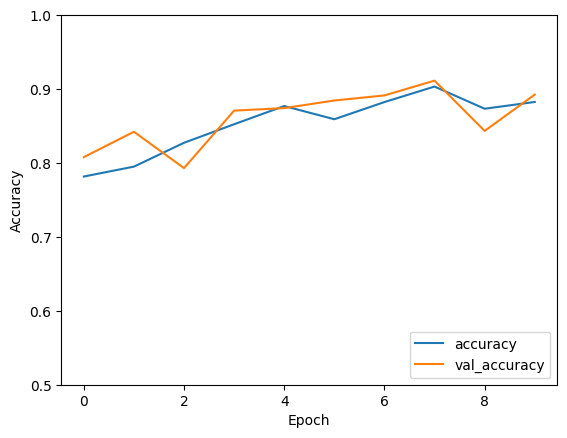

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [12]:
model.save('saved_model/first_model')

INFO:tensorflow:Assets written to: saved_model/first_model/assets


INFO:tensorflow:Assets written to: saved_model/first_model/assets


In [13]:
model.save("savedmodel")
os.system("python3 -m tf2onnx.convert --saved-model savedmodel --output model.onnx --opset 13")

INFO:tensorflow:Assets written to: savedmodel/assets


INFO:tensorflow:Assets written to: savedmodel/assets
2023-03-17 00:46:38.432979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-17 00:46:39.462098: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-17 00:46:39.462167: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-17 00:46:39.462175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen

0

In [20]:
import tensorflow_model_optimization as tfmot
pruning_schedule = tfmot.sparsity.keras.PolynomialDecay(
    initial_sparsity=0.1,
    final_sparsity=0.5,
    begin_step=0,
    end_step=1000
)

# Wrap the model with pruning
pruned_model = tfmot.sparsity.keras.prune_low_magnitude(
    model,
    pruning_schedule=pruning_schedule,
    # Set the optimizer to the same one used in the original model
    optimizer=tf.keras.optimizers.Adam(),
)

# Compile the pruned model
pruned_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Train the pruned model
pruned_model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val,),
    callbacks=[tfmot.sparsity.keras.UpdatePruningStep()]
)

# Strip the pruning wrappers from the pruned model
stripped_pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

# Save the pruned model
stripped_pruned_model.save('pruned_model')

Epoch 1/10
222/222 [==============================] - 30s 123ms/step - loss: 4.4071 - accuracy: 0.9445 - val_loss: 0.0922 - val_accuracy: 0.9777
Epoch 2/10
222/222 [==============================] - 24s 109ms/step - loss: 0.3167 - accuracy: 0.9597 - val_loss: 0.2639 - val_accuracy: 0.9680
Epoch 3/10
222/222 [==============================] - 24s 108ms/step - loss: 0.2629 - accuracy: 0.9637 - val_loss: 0.0687 - val_accuracy: 0.9800
Epoch 4/10
222/222 [==============================] - 26s 118ms/step - loss: 0.0971 - accuracy: 0.9724 - val_loss: 0.0659 - val_accuracy: 0.9811
Epoch 5/10
222/222 [==============================] - 31s 139ms/step - loss: 0.0855 - accuracy: 0.9742 - val_loss: 0.0839 - val_accuracy: 0.9817
Epoch 6/10
222/222 [==============================] - 40s 181ms/step - loss: 0.0776 - accuracy: 0.9765 - val_loss: 0.0650 - val_accuracy: 0.9817
Epoch 7/10
222/222 [==============================] - 38s 171ms/step - loss: 0.0954 - accuracy: 0.9766 - val_loss: 0.1324 - val_ac

INFO:tensorflow:Assets written to: pruned_model/assets


INFO:tensorflow:Assets written to: pruned_model/assets
